# 安装配置MMDetection

按照顺序逐行运行本代码，即可安装配置 MMCV、MMDetection环境

代码测试[云GPU环境](https://featurize.cn?s=d7ce99f842414bfcaea5662a97581bd1)：GPU RTX 3060、CUDA v11.2

OpenMMLab主页：https://openmmlab.com/

MMDetection主页：https://github.com/open-mmlab/mmdetection

作者：同济子豪兄 https://space.bilibili.com/1900783

2022-8-27

> 提示：以下代码运行时，若长时间运行卡着不动，可重启 kernel 后重新运行一遍

## 下载安装Pytorch

In [1]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple, https://download.pytorch.org/whl/cu113


## 下载安装 mmcv-full（大约需要两分钟）

In [2]:
# 安装mmcv -full
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu113/torch1.10.0/index.html

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.10.0/index.html
     |████████████████████████████████| 54.2 MB 67.3 MB/s eta 0:00:01


## 安装其它工具包（大约需要一分钟）

In [3]:
!pip install numpy pandas matplotlib seaborn opencv-python pillow tqdm ffmpegcv -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 292 kB 39.3 MB/s eta 0:00:01
  Created wheel for ffmpegcv: filename=ffmpegcv-0.2.3-py3-none-any.whl size=10033 sha256=7d83cc8159daf5780a8b9d3ee52f3827e2d47bb442d3e8d175ae7076de2dc703
  Stored in directory: /home/featurize/.cache/pip/wheels/b6/cc/2a/6dfea93edc82d701f11b96a6b0d6b72d904e2ece0f7798bf48
Successfully built ffmpegcv
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
metadrive-simulator 0.2.5.1 requires gym, which is not installed.
metadrive-simulator 0.2.5.1 requires pygame, which is not installed.
metadrive-simulator 0.2.5.1 requires numpy<=1.19.3, but you have numpy 1.21.4 which is incompatible.


## 下载安装MMDetection

In [4]:
# 删除已有的 mmdetection 文件夹（若有）
!rm -rf mmdetection

In [6]:
# 从 Github下载 MMDetection 算法库
!git clone https://github.com/open-mmlab/mmdetection.git

正克隆到 'mmdetection'...
remote: Enumerating objects: 30936, done.
remote: Counting objects: 100% (1466/1466), done.
remote: Compressing objects: 100% (758/758), done.
remote: Total 30936 (delta 775), reused 1239 (delta 704), pack-reused 29470
接收对象中: 100% (30936/30936), 40.75 MiB | 15.53 MiB/s, 完成.
处理 delta 中: 100% (21878/21878), 完成.
正在更新文件: 100% (1475/1475), 完成.


In [7]:
import os
os.chdir('mmdetection')

In [8]:
!pip install -e .

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Obtaining file:///home/featurize/work/%E3%80%90MMDetection%E3%80%91/mmdetection
     |████████████████████████████████| 106 kB 70.1 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycocotools: filename=pycocotools-2.0.4-cp37-cp37m-linux_x86_64.whl size=370201 sha256=c1e77598d09359a52fa501f520a30f424c0f4e393a35cad555bb046a4b19baf0
  Stored in directory: /home/featurize/.cache/pip/wheels/c0/01/5f/670dfd20204fc9cc6bf843db4e014acb998f411922e3abc49f
Successfully built pycocotools
  Running setup.py develop for mmdet


## 验证安装配置成功

In [13]:
## mmcv
import mmcv
from mmcv import collect_env
from mmcv.ops import get_compiling_cuda_version, get_compiler_version

print('CUDA版本', get_compiling_cuda_version())
print('编译器版本', get_compiler_version())

collect_env()

CUDA版本 11.3
编译器版本 GCC 9.3


{'sys.platform': 'linux',
 'Python': '3.7.10 (default, Jun  4 2021, 14:48:32) [GCC 7.5.0]',
 'CUDA available': True,
 'GPU 0': 'NVIDIA RTX A4000',
 'CUDA_HOME': '/usr/local/cuda',
 'NVCC': 'Cuda compilation tools, release 11.2, V11.2.152',
 'GCC': 'gcc (Ubuntu 9.3.0-17ubuntu1~20.04) 9.3.0',
 'PyTorch': '1.10.0+cu113',
 'PyTorch compiling details': 'PyTorch built with:\n  - GCC 7.3\n  - C++ Version: 201402\n  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications\n  - Intel(R) MKL-DNN v2.2.3 (Git Hash 7336ca9f055cf1bfa13efb658fe15dc9b41f0740)\n  - OpenMP 201511 (a.k.a. OpenMP 4.5)\n  - LAPACK is enabled (usually provided by MKL)\n  - NNPACK is enabled\n  - CPU capability usage: AVX512\n  - CUDA Runtime 11.3\n  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=co

In [14]:
# 检查 Pytorch
import torch, torchvision
print('Pytorch 版本', torch.__version__)
print('torchvision版本', torchvision.__version__)
print('CUDA 是否可用',torch.cuda.is_available())

Pytorch 版本 1.10.0+cu113
torchvision版本 0.11.1+cu113
CUDA 是否可用 True


In [16]:
# 检查 mmdetection
import mmdet
print(mmdet.__version__)

2.25.1


## 小试牛刀

In [17]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot

# 获取计算设备，有 GPU 就用 GPU，没有就用 CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# 导入模型
config_file = 'configs/yolox/yolox_x_8x8_300e_coco.py'
checkpoint_file = 'https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth'
model = init_detector(config_file, checkpoint_file, device=device)

# 指定测试图片
img_path = 'demo/demo.jpg'

# 运行目标检测
result = inference_detector(model, img_path)

load checkpoint from http path: https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth


Downloading: "https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth" to /home/featurize/.cache/torch/hub/checkpoints/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth


  0%|          | 0.00/379M [00:00<?, ?B/s]

/environment/miniconda3/lib/python3.7/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


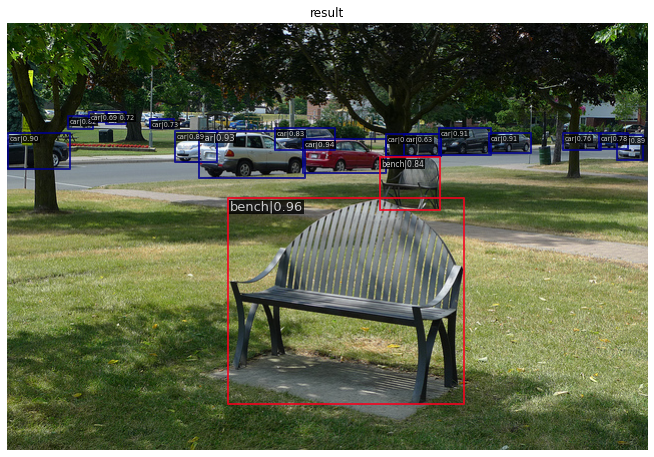

In [18]:
# 展示目标检测结果
show_result_pyplot(model, img_path, result, score_thr=0.6, palette='coco')

## 下载预训练模型权重文件、图像、视频素材

In [19]:
# 创建 checkpoints 文件夹，用于存放预训练模型权重文件
os.mkdir('checkpoints')

# 创建 outputs 文件夹，用于存放预测结果
os.mkdir('output')

# 创建 data 文件夹，用于存放图像、视频素材
os.mkdir('data')

如果报错`Unable to establish SSL connection.`，重新运行代码块即可。

In [20]:
# Faster-R-CNN 模型权重
!wget https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_caffe_fpn_1x_coco/faster_rcnn_r50_caffe_fpn_1x_coco_bbox_mAP-0.378_20200504_180032-c5925ee5.pth -P checkpoints


--2022-08-29 15:25:33--  https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_caffe_fpn_1x_coco/faster_rcnn_r50_caffe_fpn_1x_coco_bbox_mAP-0.378_20200504_180032-c5925ee5.pth
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 167290848 (160M) [application/octet-stream]
正在保存至: “checkpoints/faster_rcnn_r50_caffe_fpn_1x_coco_bbox_mAP-0.378_20200504_180032-c5925ee5.pth”

faster_rcnn_r50_caf 100%[===================>] 159.54M  92.4MB/s    用时 1.7s    

2022-08-29 15:25:35 (92.4 MB/s) - 已保存 “checkpoints/faster_rcnn_r50_caffe_fpn_1x_coco_bbox_mAP-0.378_20200504_180032-c5925ee5.pth” [167290848/167290848])



In [21]:
# 测试图像
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220713-mmdetection/images/street_uk.jpeg -P data

# 街拍，2022年3月30日
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220713-mmdetection/images/street_20220330_174028.mp4 -P data


--2022-08-29 15:25:37--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220713-mmdetection/images/street_uk.jpeg
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 469065 (458K) [image/jpeg]
正在保存至: “data/street_uk.jpeg”

street_uk.jpeg      100%[===================>] 458.07K  2.06MB/s    用时 0.2s    

2022-08-29 15:25:37 (2.06 MB/s) - 已保存 “data/street_uk.jpeg” [469065/469065])

--2022-08-29 15:25:38--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220713-mmdetection/images/street_20220330_174028.mp4
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 13575276 (13M) [video/mp4]
正在保存至: “data/street_20220330_174028.mp4”

street_20220330_174 100%[===================>]  12.95M  19.4MB/s    用时 0.7s    

2022-08-29 15:25:39 (19.4 MB/s) - 已保存 “data/street_20220330_174028.mp4” [13575276/13575276])



In [30]:
!unset http_proxy

In [28]:
!wget http://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth -P checkpoints


--2022-08-29 16:57:57--  http://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco/mask_rcnn_r50_caffe_fpn_mstrain-poly_3x_coco_bbox_mAP-0.408__segm_mAP-0.37_20200504_163245-42aa3d00.pth
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 404 Not Found
2022-08-29 16:57:57 错误 404：Not Found。



In [31]:
!wget https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_1x_coco/mask_rcnn_r50_caffe_fpn_1x_coco_bbox_mAP-0.38__segm_mAP-0.344_20200504_231812-0ebd1859.pth 


--2022-08-29 17:00:24--  https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_caffe_fpn_1x_coco/mask_rcnn_r50_caffe_fpn_1x_coco_bbox_mAP-0.38__segm_mAP-0.344_20200504_231812-0ebd1859.pth
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 177866833 (170M) [application/octet-stream]
正在保存至: “mask_rcnn_r50_caffe_fpn_1x_coco_bbox_mAP-0.38__segm_mAP-0.344_20200504_231812-0ebd1859.pth”

mask_rcnn_r50_caffe 100%[===================>] 169.63M  9.03MB/s    用时 18s     

2022-08-29 17:00:43 (9.54 MB/s) - 已保存 “mask_rcnn_r50_caffe_fpn_1x_coco_bbox_mAP-0.38__segm_mAP-0.344_20200504_231812-0ebd1859.pth” [177866833/177866833])

